In [2]:
import pandas as pd
import numpy as np
import math
import torch

In [3]:
data = pd.read_excel('data.xlsx')
data

,Unnamed: 0,Title,Date,Viewers,Type
0,0,Мәжіліс пен мәслихаттар сайлауында 12 451 канд...,"\n\n 25.02.2023, 21:03 ...",166,News
1,1,Бейбарыс Сұлтанның туғанына 800 жыл,"\n\n 24.02.2023, 20:13 ...",252,News
2,2,Тікұшақ апаты: ТЖМ өкілдері қаза тапқан 4 адам...,"\n\n 24.02.2023, 19:57 ...",202,News
3,3,Польша-Беларусь шекарасы жабылды,"\n\n 24.02.2023, 19:55 ...",215,News
4,4,Түркияның Хатай провинциясында тағы жер сілкін...,"\n\n 24.02.2023, 19:42 ...",204,News
...,...,...,...,...,...
10391,10391,«Айнаline»,"\n\n 14.09.2022, 19:44 ...",1147,TeleProjects
10392,10392,«Уәде»,"\n\n 14.09.2022, 20:04 ...",716,TeleProjects
10393,10393,«Бізге хабарласқан»,"\n\n 14.09.2022, 20:19 ...",833,TeleProjects
10394,10394,«7 күн»,"\n\n 19.11.2014, 16:18 ...",35037,TeleProjects


In [4]:
#Preprocessing
news = data[data['Type'] == 'News']
news['Date'] = news['Date'].str.strip()
news['Day'] = news['Date'].str[0:2]
news['Month'] = news['Date'].str[3:5]
news['Year'] = news['Date'].str[6:10]
news['Time']=news['Date'].str[12:17]

# news['Date'].str[0:2] #Day
# news['Date'].str[3:5] #Month
# news['Date'].str[6:10] #Year
# news['Date'].str[12:17] #Time



C:\Users\User\AppData\Local\Temp\ipykernel_29744\650274457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Date'] = news['Date'].str.strip()
C:\Users\User\AppData\Local\Temp\ipykernel_29744\650274457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Day'] = news['Date'].str[0:2]
C:\Users\User\AppData\Local\Temp\ipykernel_29744\650274457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<PandasArray>
['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
 '2023']
Length: 10, dtype: object


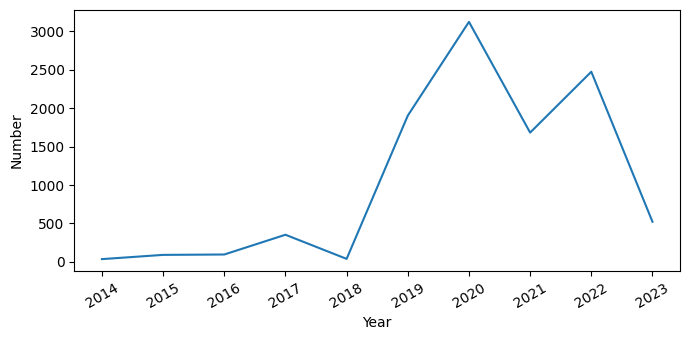

Year
2014      36
2015      91
2016      96
2017     353
2018      39
2019    1903
2020    3123
2021    1682
2022    2474
2023     522
Name: Title, dtype: int64
Month
01    1329
02    1005
03     922
04     768
05     683
06     765
07     666
08     567
09     788
10     795
11     931
12    1100
Name: Title, dtype: int64
Day
01    303
02    338
03    311
04    317
05    365
06    326
07    341
08    319
09    413
10    344
11    306
12    363
13    361
14    326
15    308
16    341
17    340
18    323
19    326
20    411
21    363
22    328
23    346
24    336
25    326
26    354
27    356
28    324
29    326
30    334
31    144
Name: Title, dtype: int64


<Figure size 700x350 with 0 Axes>

In [7]:
#task-1
newsCountByYear = news.groupby(['Year'])['Title'].count()
newsCountByMonth = news.groupby(['Month'])['Title'].count()
newsCountByDay = news.groupby(['Day'])['Title'].count()
newsCountByMonth2022 = news[news['Year'] == '2022'].groupby(['Month'])['Title'].count()

print(newsCountByYear.index.array)


from matplotlib import pyplot as plt, dates
import datetime
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
x = np.array(newsCountByYear.index.array)
y = np.array(newsCountByYear)
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d %H:%M'))
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number')
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=30, fontdict={'horizontalalignment': 'center'})
plt.show()
                                 
# x = np.array(newsCountByMonth.index.array)
# y = np.array(newsCountByMonth)
# ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d %H:%M'))
# plt.plot(x, y)
# plt.xlabel('Month')
# plt.ylabel('Number')
# ax.set_xticks(x)
# ax.set_xticklabels(x, rotation=30, fontdict={'horizontalalignment': 'center'})
# plt.show()
                                 
# x = np.array(newsCountByDay.index.array)
# y = np.array(newsCountByDay)
# ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d %H:%M'))
# plt.plot(x, y)
# plt.xlabel('Day')
# plt.ylabel('Number')
# ax.set_xticks(x)
# ax.set_xticklabels(x, rotation=30, fontdict={'horizontalalignment': 'center'})
# plt.show()

# x = np.array(newsCountByMonth2022.index.array)
# y = np.array(newsCountByMonth2022)
# ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d %H:%M'))
# plt.plot(x, y)
# plt.xlabel('Month2022')
# plt.ylabel('Number')
# ax.set_xticks(x)
# ax.set_xticklabels(x, rotation=30, fontdict={'horizontalalignment': 'center'})
# plt.show()
plt.savefig('plot.png')

print(newsCountByYear)
print(newsCountByMonth)
print(newsCountByDay)

In [8]:
news

,Unnamed: 0,Title,Date,Viewers,Type,Day,Month,Year,Time
0,0,Мәжіліс пен мәслихаттар сайлауында 12 451 канд...,"25.02.2023, 21:03",166,News,25,02,2023,21:03
1,1,Бейбарыс Сұлтанның туғанына 800 жыл,"24.02.2023, 20:13",252,News,24,02,2023,20:13
2,2,Тікұшақ апаты: ТЖМ өкілдері қаза тапқан 4 адам...,"24.02.2023, 19:57",202,News,24,02,2023,19:57
3,3,Польша-Беларусь шекарасы жабылды,"24.02.2023, 19:55",215,News,24,02,2023,19:55
4,4,Түркияның Хатай провинциясында тағы жер сілкін...,"24.02.2023, 19:42",204,News,24,02,2023,19:42
...,...,...,...,...,...,...,...,...,...
10314,10314,Ардагерлер азайып бара жатыр...,"26.12.2014, 18:22",6295,News,26,12,2014,18:22
10315,10315,Жақия Мұсатаев: Өскелең ұрпақ бүгінгі бейбіт к...,"21.12.2014, 04:18",4890,News,21,12,2014,04:18
10316,10316,Таразда Ардагерлер үйі ашылды,"16.12.2014, 23:50",7138,News,16,12,2014,23:50
10317,10317,ҰОС ардагері А.Кияткин ұрпақтарымен бақуатты ө...,"04.12.2014, 11:20",2796,News,04,12,2014,11:20


In [9]:
count_dict = dict()
for sentence in news['Title']:
    for text in sentence.split(' '):

        if text in count_dict:
            count_dict[text] += 1
        else:
            count_dict[text] = 1

# count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1]))

count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1]))
count_dict

count = 0
words = []
counts = []
for i in reversed(count_dict):
    if count < 40:
        words.append(i)
        counts.append(count_dict[i])
    else:
        break
    count+=1    
print(words)
print(counts)

['облысында', 'Мемлекет', 'Тоқаев', 'басшысы', 'жатыр', 'мен', 'қабылдады', 'Президент', 'Қасым-Жомарт', 'Қазақстан', 'өтті', 'жаңа', 'басым', 'бөлігінде', 'ауа', '«Хабар»', 'Еліміздің', 'райы', 'және', 'отыр', 'Елімізде', 'қатысты', 'Қ.', '–', 'адам', 'Алматыда', 'туралы', 'ҚР', 'болады', 'кездесті', 'Елбасы', 'Алматы', 'сақталады', 'тұр', 'үшін', 'облысындағы', 'болды', 'су', 'Қарағанды', 'мүмкін']
[494, 400, 397, 391, 339, 331, 327, 307, 301, 296, 289, 285, 263, 251, 241, 238, 235, 235, 225, 217, 216, 213, 207, 196, 196, 193, 184, 183, 182, 167, 163, 162, 159, 159, 157, 157, 157, 153, 152, 151]


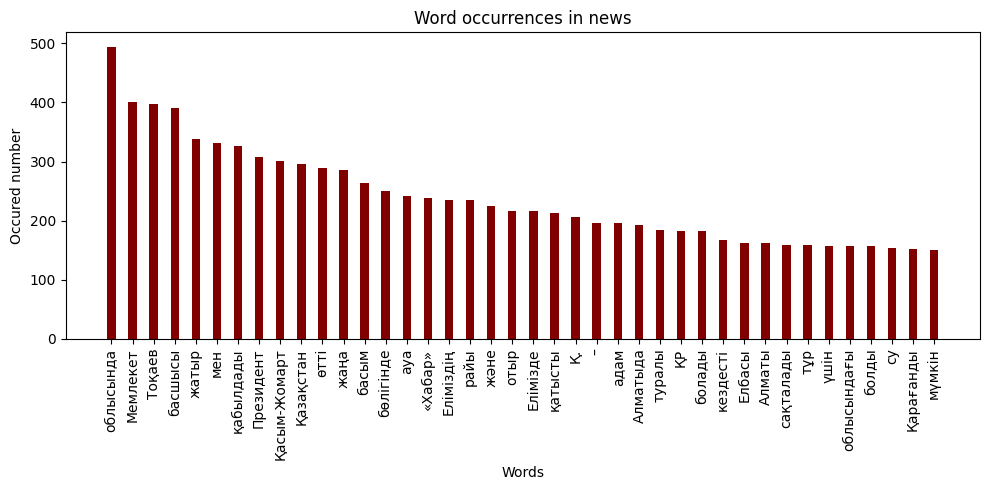

<Figure size 700x350 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words, counts, color ='maroon',
        width = 0.4)
 
plt.xlabel("Words")
plt.xticks(rotation=90)

plt.ylabel("Occured number")
plt.title("Word occurrences in news")
plt.show()
plt.savefig('plot.png', transparent=False)


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vectorizer = TfidfVectorizer()
data = news
data = data.drop('Type', axis = 1)
data = data.drop('Date', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
title_vectorized = vectorizer.fit_transform(data['Title'])
# Convert the encoded data to DataFrames
title_vectorized_df = pd.DataFrame(title_vectorized.toarray())

# Concatenate the encoded data with the remaining features
data = pd.concat([title_vectorized_df, data.drop('Title', axis=1)], axis=1)
data.dtypes
# df['col1'] = df['col1'].astype(float)

0          float64
1          float64
2          float64
3          float64
4          float64
            ...   
Viewers      int64
Day         object
Month       object
Year        object
Time        object
Length: 15884, dtype: object

In [9]:
dataWithDate = data
data = data.drop('Year', axis = 1)
data = data.drop('Month', axis = 1)
data = data.drop('Day', axis = 1)
data = data.drop('Time', axis = 1)
dataWithoutDate = data

In [10]:
dataWithoutDate
# tensor = torch.tensor(dataWithoutDate.values)
# tensor = tensor.to('cuda')
# x = dataWithoutDate.drop('Viewers', axis = 1)
# x
# Assuming you have a dataframe called 'df'
# row_sums = x.sum(axis=0)

# Printing the row sums
# print(row_sums)


,0,1,2,3,4,5,6,7,8,9,...,15870,15871,15872,15873,15874,15875,15876,15877,15878,Viewers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6295
10315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4890
10316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7138
10317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2796


In [55]:
# Split the data into training and testing sets

y = dataWithoutDate['Viewers']
X = dataWithoutDate.drop('Viewers', axis = 1)

X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


In [37]:
X_train_tensor.shape[1]

15879

In [135]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

# Define a custom PyTorch estimator class
class PyTorchEstimator(BaseEstimator):
    def __init__(self, input_dim, lr=0.01, momentum=0.9, num_epochs=100):
        self.input_dim = input_dim
        self.lr = lr
        self.momentum = momentum
        self.num_epochs = num_epochs
        self.device = device
        
        self.model = nn.Linear(input_dim, 1).to(self.device)

    def fit(self, X_tensor, y_tensor):      
        self.model.to(self.device)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        criterion = nn.MSELoss()
        print(self.momentum, self.lr)
        for epoch in range(self.num_epochs):
            
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
            loss_values_each_param.append(loss.item())
        loss_values_all[str(self.momentum) + " " +  str(self.lr)] = loss_values_each_param
        return self

    def predict(self, X_tensor):
        outputs = self.model(X_tensor)
        return outputs.cpu().detach().numpy()

    
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'momentum': [0.9, 0.95, 0.99]
}

loss_values_all = dict()
# Initialize an empty list to store the loss values
loss_values_each_param = []


# Create the PyTorch estimator
estimator = PyTorchEstimator(input_dim =X_train_tensor.shape[1])

# Create the grid search object
grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv = 2)

# Perform grid search with cross-validation
grid_search.fit(X_train_tensor, y_train_tensor)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the entire training set
best_model.fit(X_train_tensor, y_train_tensor)
y_pred = torch.tensor(y_pred)
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_tensor)
mse = mean_squared_error(y_test_tensor.cpu(), y_pred.cpu())
print("Mean Squared Error:", mse)


0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([4127])) that is different to the input size (torch.Size([4127, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001
0.9 0.001


C:\Users\User\AppData\Local\Temp\ipykernel_10652\1235975740.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred)


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = best_model.predict(X_test_tensor)
y_pred = torch.tensor(y_pred)

mse = mean_squared_error(y_test_tensor.cpu(), y_pred.cpu())
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_tensor.cpu(), y_pred.cpu())
print("MAE: ", mae)
# Calculate R-squared (R2) Score
r2 = r2_score(y_test_tensor.cpu(), y_pred.cpu())
print("R2: ", r2)

Mean Squared Error: 2049326.1
RMSE:  1431.5468
MAE:  1181.9465
R2:  -2.141586238612098


In [112]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

# Define a custom PyTorch estimator class
class PyTorchEstimator(BaseEstimator):
    def __init__(self, input_dim, hidden_dim, lr=0.01, momentum=0.9, num_epochs=100):
        self.input_dim = input_dim
        self.lr = lr
        self.momentum = momentum
        self.hidden_dim = hidden_dim
        self.num_epochs = num_epochs
        self.device = device
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        ).to(self.device)
            
            
    def fit(self, X_tensor, y_tensor):      
        self.model.to(self.device)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        criterion = nn.MSELoss()
        print(self.momentum, self.lr)
        for epoch in range(self.num_epochs):
            
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
            loss_values_each_param.append(loss.item())
        loss_values_all[str(self.momentum) + " " +  str(self.lr)] = loss_values_each_param
        return self
    
    def predict(self, X_tensor):
        outputs = self.model(X_tensor)
        return outputs.cpu().detach().numpy()

    
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_dim': [64, 128, 256],
    'lr': [0.001, 0.01, 0.1],
    'momentum': [0.9, 0.95, 0.99]
}


loss_values_all = dict()
# Initialize an empty list to store the loss values
loss_values_each_param = []


# Create the PyTorch estimator
estimator = PyTorchEstimator(input_dim =X_train_tensor.shape[1], hidden_dim=128)

# Create the grid search object
grid_search = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv = 2)

# Perform grid search with cross-validation
grid_search.fit(X_train_tensor, y_train_tensor)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the entire training set
best_model.fit(X_train_tensor, y_train_tensor)
y_pred = torch.tensor(y_pred)
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_tensor)
mse = mean_squared_error(y_test_tensor.cpu(), y_pred.cpu())
print("Mean Squared Error:", mse)


0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([4127])) that is different to the input size (torch.Size([4127, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.001


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.01


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.95 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.99 0.1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _ch

0.9 0.001
0.9 0.001


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = best_model.predict(X_test_tensor)
y_pred = torch.tensor(y_pred)

mse = mean_squared_error(y_test_tensor.cpu(), y_pred.cpu())
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_tensor.cpu(), y_pred.cpu())
print("MAE: ", mae)
# Calculate R-squared (R2) Score
r2 = r2_score(y_test_tensor.cpu(), y_pred.cpu())
print("R2: ", r2)

Mean Squared Error: 2035534.2
RMSE:  1426.7216
MAE:  1176.0743
R2:  -2.1204436806001103


In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.svm import SVR

# Define a custom PyTorch estimator class
class PyTorchEstimator(BaseEstimator):
    def __init__(self, input_dim, hidden_dim, lr=0.01, momentum=0.9, num_epochs=100):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.lr = lr
        self.momentum = momentum
        self.num_epochs = num_epochs
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        ).to(self.device)

    def fit(self, X, y):      
        
        self.model.to(self.device)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        criterion = nn.MSELoss()
        
        for epoch in range(self.num_epochs):
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        outputs = self.model(X)
        return outputs.cpu().detach().numpy()

# Define the parameter grid for hyperparameter tuning
# param_grid_svr = {
#     'kernel': ['linear', 'rbf'],
#     'C': [0.1, 1.0, 10.0],
#     'epsilon': [0.01, 0.1, 0.5]
# }

param_grid_pytorch = {
    'hidden_dim': [64, 128, 256],
    'lr': [0.001, 0.01, 0.1],
    'momentum': [0.9, 0.95, 0.99]
}

# Create the PyTorch estimator
pytorch_estimator = PyTorchEstimator(input_dim=X_train.shape[1], hidden_dim=128)

# Create the SVR estimator
# svr_estimator = SVR()

# Create the grid search object for PyTorch
grid_search_pytorch = GridSearchCV(pytorch_estimator, param_grid_pytorch, scoring='neg_mean_squared_error', cv=2)

# Perform grid search with cross-validation for PyTorch
grid_search_pytorch.fit(X_train, y_train)

# Get the best PyTorch model and its parameters
best_pytorch_model = grid_search_pytorch.best_estimator_
best_pytorch_params = grid_search_pytorch.best_params_

# Train the best PyTorch model on the entire training set
best_pytorch_model.fit(X_train, y_train)

y_pred_pytorch = best_pytorch_model.predict(X_test)
mse_pytorch = mean_squared_error(y_test, y_pred_pytorch)

# Create the grid search object for SVR
# grid_search_svr = GridSearchCV(svr_estimator, param_grid_svr, scoring='neg_mean_squared_error', cv=2)

# Perform grid search with cross-validation for SVR
# grid_search_svr.fit(X_train, y_train)

# Get


ValueError: 
All the 54 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_10652\3516679031.py", line 26, in fit
    X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
ValueError: could not determine the shape of object type 'Series'

--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_10652\3516679031.py", line 26, in fit
    X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
ValueError: expected sequence of length 4128 at dim 0 (got 15879)


In [94]:
y_pred = torch.tensor(y_pred)
mse = mean_squared_error(y_test_tensor.cpu(), y_pred.cpu())
print(mse)

2049328.0


In [88]:
estimator.model.parameters

'<bound method Module.parameters of Linear(in_features=15879, out_features=1, bias=True)>'

In [103]:
len(loss_values_all['0.9 0.001'])

2000

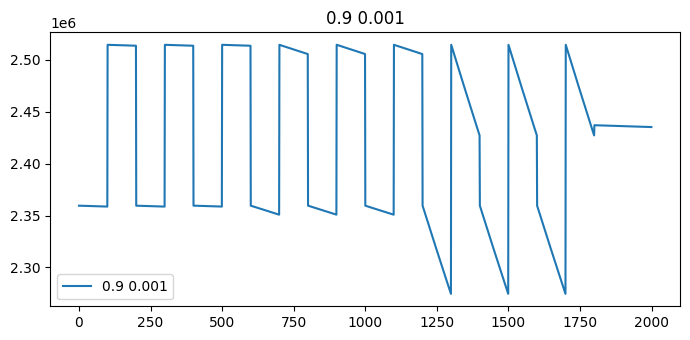

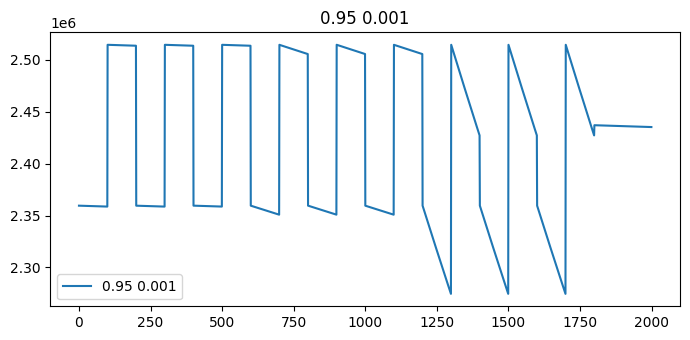

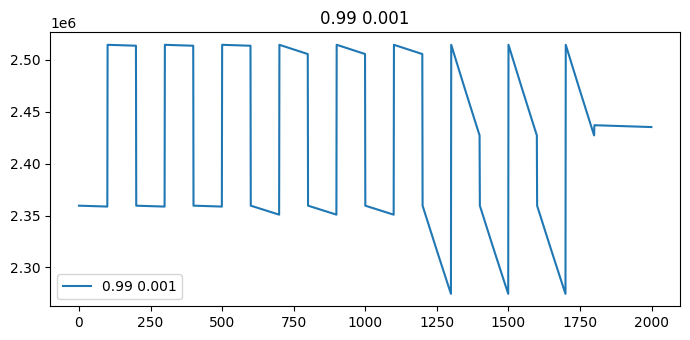

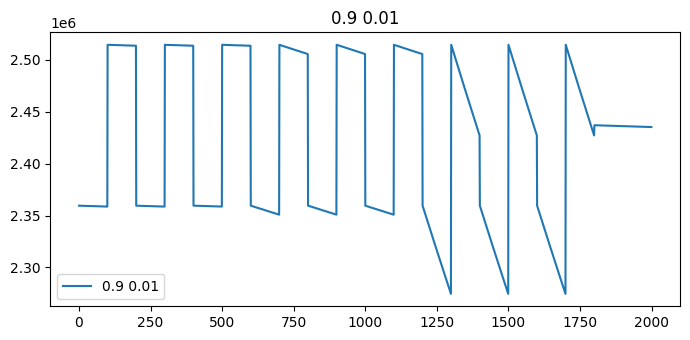

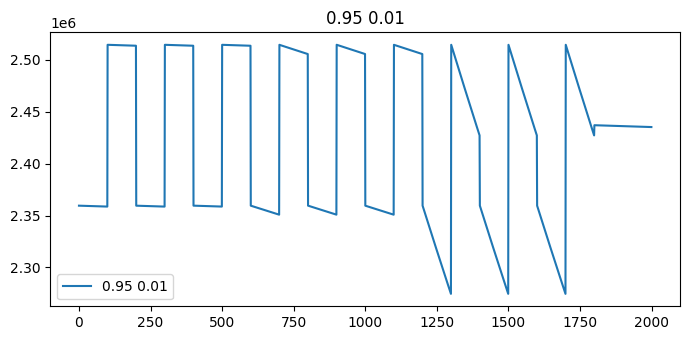

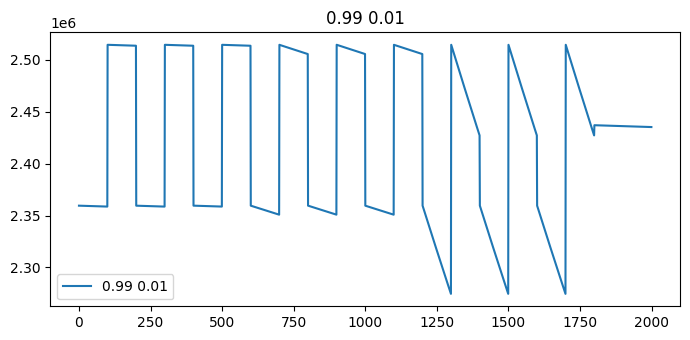

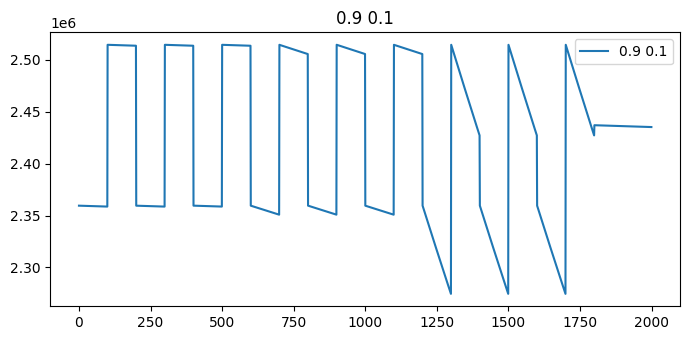

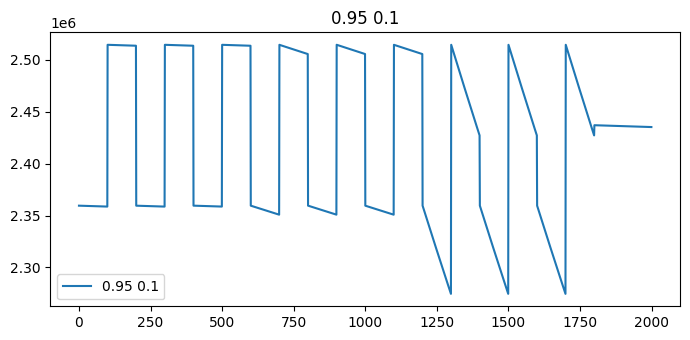

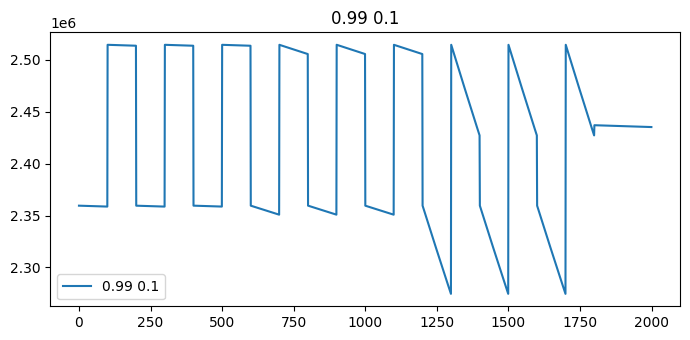

In [99]:
import matplotlib.pyplot as plt
x = range(101) 
labels = ['Graph 1', 'Graph 2', 'Graph 3']
i = 0
# Iterate over the data and labels
for key in loss_values_all:
    # Create a new figure for each graph
    plt.figure(i+1)
    plt.plot(loss_values_all[key], label=key)
    plt.title(key)
    plt.legend()
    i+=1
# Show all the plots
plt.show()


In [ ]:
X_train.shape[1]

In [ ]:
print(best_model)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True]
}

# Create the linear regression model
regressor = LinearRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [114]:
import torch

# Your code utilizing GPU resources

# Empty the GPU cache to release memory
torch.cuda.empty_cache()